# 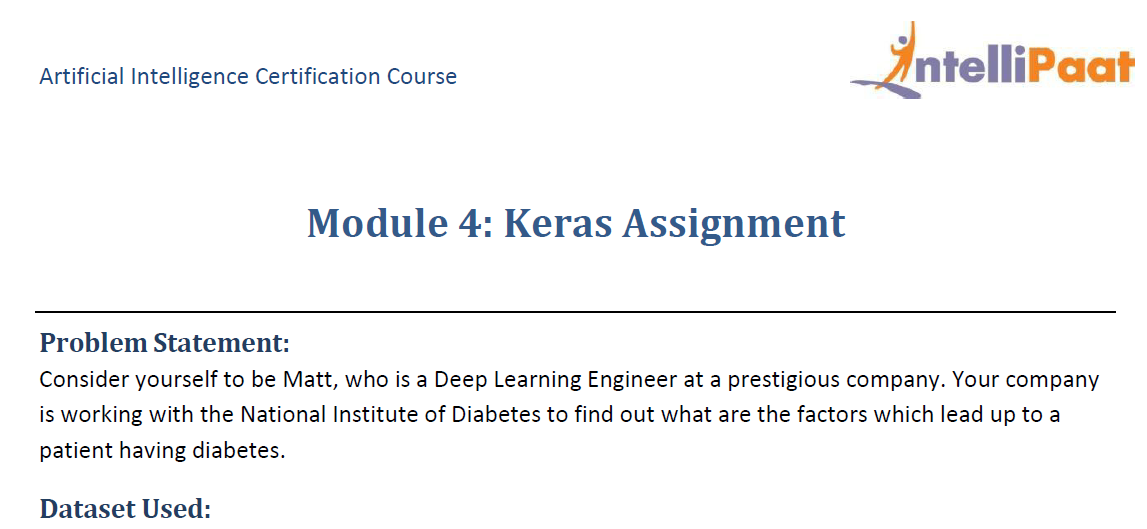

# 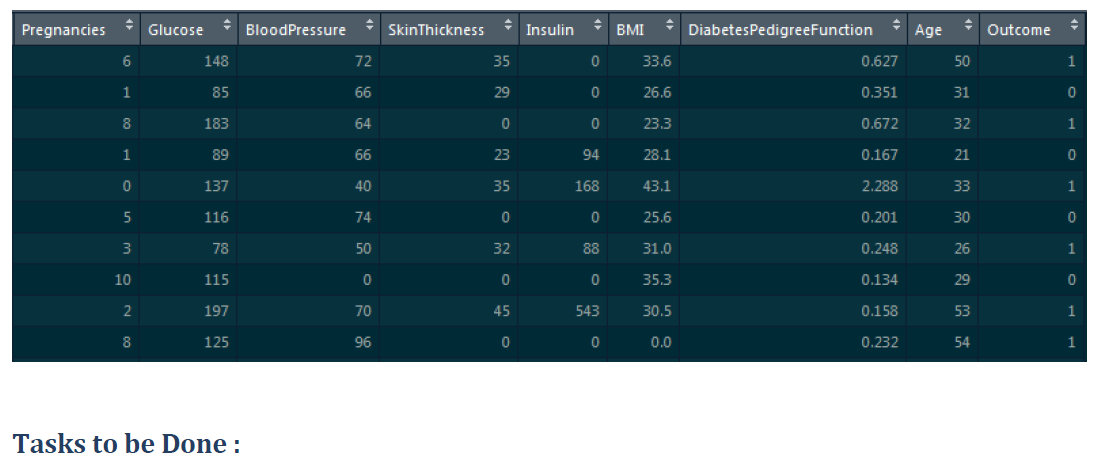

### A. Build a sequential model using Keras on top of this Diabetes dataset to find out if the patient has diabetes or not, using ‘Pregnancies’, ‘Glucose’ & ‘BloodPressure’ as independent columns.
    a. This model should have 1 hidden layer with 8 nodes
    b. Use Stochastic Gradient as the optimization algorithm
    c. Fit the model, with number of epochs to be 100 and batch size to be 10

##### Downloaded the csv on my local PC from https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

### 1. Importing requird library

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import loadtxt
from sklearn.model_selection  import train_test_split
from keras.models import Sequential
# from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [2]:
tf.__version__

'2.13.0'

### 2. Load Data

In [3]:
diabetes_df = pd.read_csv('pima-indians-diabetes.data.csv', names=["Pregnancies", "Glucose", "BloddPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])

In [4]:
diabetes_df.head()

,Pregnancies,Glucose,BloddPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 3. Preparing independent data using  ‘Pregnancies’, ‘Glucose’ & ‘BloodPressure’

In [5]:
X=diabetes_df.drop(columns=["SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"],axis=1)

In [6]:
X.shape

(768, 3)

#### 4. Creating target column

In [7]:
y=diabetes_df["DiabetesPedigreeFunction"]

In [8]:
y.shape

(768,)

#### 5. Splitting data into train and test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [10]:

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

##    a. This model should have 1 hidden layer with 8 nodes
#### 6. Preparing Model

In [11]:

model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(3,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

##   b. Use Stochastic Gradient as the optimization algorithm
#### 7. Applying optimization logic

In [12]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
              loss=tf.keras.losses.binary_crossentropy, #categorical_crossentropy,
              metrics = ["acc"])

##   c. Fit the model, with number of epochs to be 100 and batch size to be 10
#### 8. Fit the model

In [13]:
model.fit(X_train, y_train,epochs=100, batch_size=10, verbose=1)

Epoch 1/100
52/52 [==============================] - 1s 2ms/step - loss: 0.7024 - acc: 0.0000e+00
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6986 - acc: 0.0000e+00
Epoch 3/100
52/52 [==============================] - 0s 3ms/step - loss: 0.6956 - acc: 0.0000e+00
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6936 - acc: 0.0000e+00
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6920 - acc: 0.0000e+00
Epoch 6/100
52/52 [==============================] - 0s 3ms/step - loss: 0.6909 - acc: 0.0000e+00
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6901 - acc: 0.0000e+00
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6895 - acc: 0.0000e+00
Epoch 9/100
52/52 [==============================] - 0s 3ms/step - loss: 0.6890 - acc: 0.0000e+00
Epoch 10/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6887 - acc: 0.0000e+00
Epoch 11/100
52/52 

52/52 [==============================] - 0s 3ms/step - loss: 0.6816 - acc: 0.0000e+00
Epoch 84/100
52/52 [==============================] - 0s 3ms/step - loss: 0.6816 - acc: 0.0000e+00
Epoch 85/100
52/52 [==============================] - 0s 3ms/step - loss: 0.6816 - acc: 0.0000e+00
Epoch 86/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6815 - acc: 0.0000e+00
Epoch 87/100
52/52 [==============================] - 0s 3ms/step - loss: 0.6815 - acc: 0.0000e+00
Epoch 88/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6814 - acc: 0.0000e+00
Epoch 89/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6814 - acc: 0.0000e+00
Epoch 90/100
52/52 [==============================] - 0s 3ms/step - loss: 0.6813 - acc: 0.0000e+00
Epoch 91/100
52/52 [==============================] - 0s 3ms/step - loss: 0.6813 - acc: 0.0000e+00
Epoch 92/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6813 - acc: 0.0000e+00
Epoch 93/100
52/52 [===

In [14]:
# y_pred = model.predict_classes(X_test)
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

8/8 [==============================] - 0s 3ms/step - loss: 0.6904 - acc: 0.0000e+00
[0.690446674823761, 0.0]


In [15]:
y_pred = model.predict(X_test)

8/8 [==============================] - 0s 3ms/step


In [16]:
y_pred

array([[0.40563536],
       [0.44598052],
       [0.448475  ],
       [0.44015488],
       [0.4412815 ],
       [0.4402292 ],
       [0.44657505],
       [0.462074  ],
       [0.5334477 ],
       [0.49192068],
       [0.40854874],
       [0.55332357],
       [0.5109149 ],
       [0.43956482],
       [0.4386765 ],
       [0.49681708],
       [0.44288102],
       [0.4398389 ],
       [0.5874393 ],
       [0.50105613],
       [0.43994606],
       [0.46779826],
       [0.39162406],
       [0.44821355],
       [0.4640225 ],
       [0.5872288 ],
       [0.41475138],
       [0.45524   ],
       [0.45145288],
       [0.44327003],
       [0.6031555 ],
       [0.48900667],
       [0.61090344],
       [0.56834555],
       [0.44735056],
       [0.5243139 ],
       [0.6876004 ],
       [0.45125   ],
       [0.42880002],
       [0.49094397],
       [0.41950646],
       [0.5098569 ],
       [0.43988815],
       [0.39362586],
       [0.44160232],
       [0.563405  ],
       [0.43927073],
       [0.439

In [17]:
len(y_pred)

254

# B. Build another sequential model where ‘Outcome’ is the dependent variable and allother columns are predictors.
    a. This model should have 3 hidden layers with 16 nodes in each layer
    b. Use ‘adam’ as the optimization algorithm
    c. Fit the model, with number of epochs to be 150 and batch size to be 10

In [18]:
X=diabetes_df.drop(columns=["Outcome"],axis=1)

In [19]:
X.shape

(768, 8)

In [20]:
X.head()

,Pregnancies,Glucose,BloddPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


#### 1. Creating target column

In [21]:
y=diabetes_df["Outcome"]

In [22]:
y.shape

(768,)

In [23]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

#### 2. Splitting data into train and test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [25]:

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

##    a. This model should have 3 hidden layers with 16 nodes in each layer
#### 3. Preparing Model

In [26]:

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(8,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##   b. Use ‘adam’ as the optimization algorithm
#### 4. Applying optimization logic

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss=tf.keras.losses.binary_crossentropy, #categorical_crossentropy,
              metrics = ["acc"])

##   c. Fit the model, with number of epochs to be 150 and batch size to be 10
#### 5. Fit the model

In [28]:
model.fit(X_train, y_train,epochs=150, batch_size=10, verbose=1)

Epoch 1/150
52/52 [==============================] - 1s 3ms/step - loss: 0.5775 - acc: 0.6868
Epoch 2/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4791 - acc: 0.7743
Epoch 3/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4586 - acc: 0.7743
Epoch 4/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4355 - acc: 0.7860
Epoch 5/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4308 - acc: 0.7860
Epoch 6/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4213 - acc: 0.7977
Epoch 7/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4200 - acc: 0.8016
Epoch 8/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4078 - acc: 0.8074
Epoch 9/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4050 - acc: 0.8016
Epoch 10/150
52/52 [==============================] - 0s 2ms/step - loss: 0.3964 - acc: 0.8113
Epoch 11/150
52/52 [==============================] - 0s 2m

52/52 [==============================] - 0s 3ms/step - loss: 0.1909 - acc: 0.9300
Epoch 88/150
52/52 [==============================] - 0s 2ms/step - loss: 0.1841 - acc: 0.9300
Epoch 89/150
52/52 [==============================] - 0s 3ms/step - loss: 0.1693 - acc: 0.9455
Epoch 90/150
52/52 [==============================] - 0s 3ms/step - loss: 0.1701 - acc: 0.9377
Epoch 91/150
52/52 [==============================] - 0s 2ms/step - loss: 0.1688 - acc: 0.9377
Epoch 92/150
52/52 [==============================] - 0s 2ms/step - loss: 0.1755 - acc: 0.9436
Epoch 93/150
52/52 [==============================] - 0s 2ms/step - loss: 0.1567 - acc: 0.9475
Epoch 94/150
52/52 [==============================] - 0s 2ms/step - loss: 0.1552 - acc: 0.9436
Epoch 95/150
52/52 [==============================] - 0s 2ms/step - loss: 0.1557 - acc: 0.9494
Epoch 96/150
52/52 [==============================] - 0s 3ms/step - loss: 0.1607 - acc: 0.9514
Epoch 97/150
52/52 [==============================] - 0s 3ms/st

In [29]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

8/8 [==============================] - 0s 3ms/step - loss: 1.6652 - acc: 0.6575
[1.6652096509933472, 0.6574802994728088]


In [30]:
y_pred = model.predict(X_test)

8/8 [==============================] - 0s 2ms/step


In [31]:
y_pred

array([[1.03994675e-01],
       [4.09892481e-03],
       [3.99494497e-03],
       [7.90072620e-01],
       [7.07474470e-01],
       [2.29029860e-02],
       [5.31619020e-12],
       [6.10296568e-03],
       [6.56451821e-01],
       [2.33788535e-01],
       [2.89498448e-01],
       [5.13784468e-01],
       [3.72383765e-05],
       [6.89890161e-02],
       [7.37227674e-05],
       [8.16698968e-02],
       [8.22874717e-04],
       [1.36343488e-05],
       [9.99043882e-01],
       [9.98835266e-01],
       [9.99827087e-01],
       [8.08187650e-08],
       [1.10630365e-02],
       [3.96942523e-09],
       [9.98012066e-01],
       [1.62424892e-01],
       [6.76074326e-01],
       [4.16436478e-06],
       [8.76142149e-05],
       [5.64812763e-06],
       [9.86077905e-01],
       [9.99824941e-01],
       [9.99431372e-01],
       [9.99995589e-01],
       [9.98282075e-01],
       [9.68016505e-01],
       [9.99065101e-01],
       [9.89054203e-01],
       [7.91138955e-05],
       [8.86793315e-01],
